#### Imports

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pathlib import Path

### Parameters

In [2]:
tickers = ["AAPL", "MSFT", "AMZN", "JPM", "JNJ", "XOM", "PFE", "TSLA", "META", "KO"]
start_date = "2018-01-01"
end_date = "2024-12-31"

assets_path = Path("../data/assets")
factors_path = Path("../data/factors")

assets_path.mkdir(parents=True, exist_ok=True)
factors_path.mkdir(parents=True, exist_ok=True)

### Download Asset Returns

In [8]:
prices = yf.download(tickers, start=start_date, end=end_date)["Close"]
returns = prices.pct_change().dropna()
returns.to_csv(assets_path / "asset_returns.csv")
print(f"Saved asset returns to {assets_path / 'asset_returns.csv'}")
returns

[*********************100%***********************]  10 of 10 completed

Saved asset returns to ../data/assets/asset_returns.csv


Ticker,AAPL,AMZN,JNJ,JPM,KO,META,MSFT,PFE,TSLA,XOM
Date,,,,,,,,,,
2018-01-03,-0.000174,0.012775,0.009552,0.001019,-0.002196,0.017914,0.004654,0.007409,-0.010233,0.019640
2018-01-04,0.004645,0.004476,-0.000071,0.014326,0.014085,-0.001841,0.008802,0.002180,-0.008290,0.001384
2018-01-05,0.011385,0.016163,0.008253,-0.006419,-0.000217,0.013671,0.012398,0.001902,0.006230,-0.000806
2018-01-08,-0.003714,0.014425,0.001270,0.001477,-0.001519,0.007653,0.001021,-0.011123,0.062638,0.004496
2018-01-09,-0.000115,0.004676,0.015857,0.005069,0.005000,-0.002178,-0.000679,-0.001097,-0.008085,-0.004246
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003065,0.000622,0.005538,0.003325,-0.002718,0.024947,-0.003092,0.013278,0.022657,0.004062
2024-12-24,0.011478,0.017729,0.003993,0.016444,0.007374,0.013170,0.009374,0.001123,0.073572,0.000941
2024-12-26,0.003176,-0.008732,-0.001851,0.003425,-0.004297,-0.007240,-0.002777,-0.006731,-0.017630,0.000846


<Axes: xlabel='Date'>

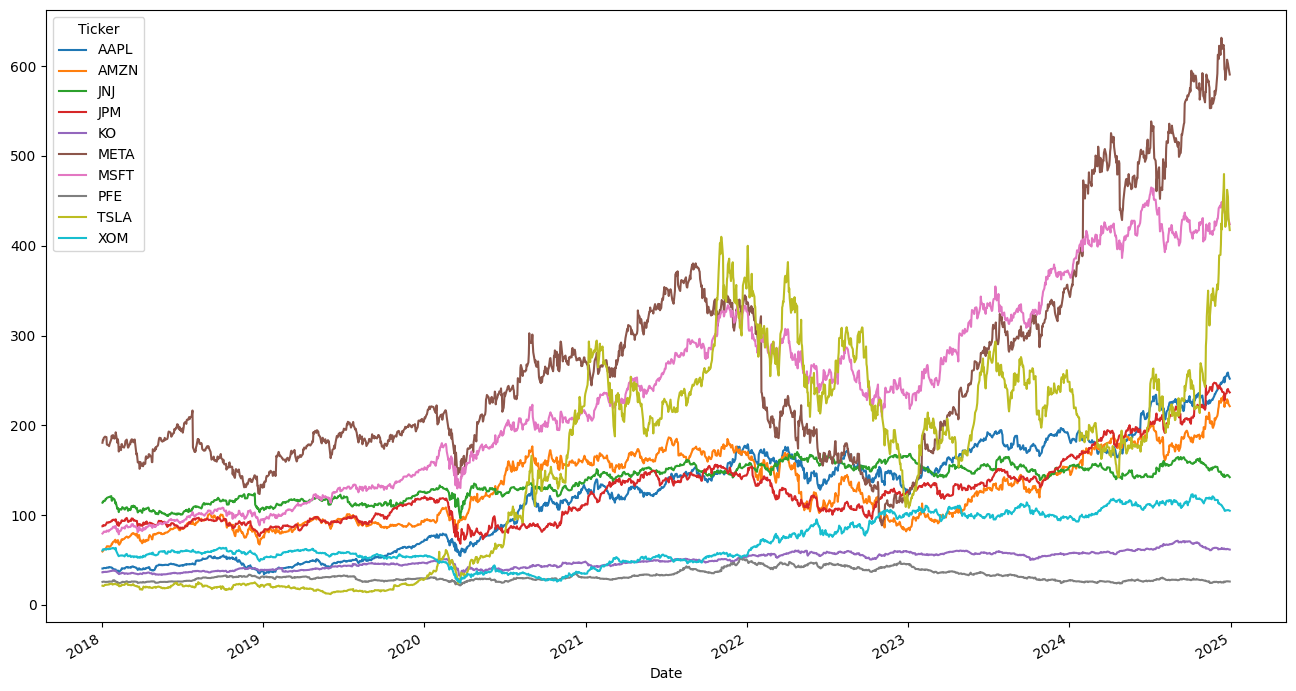

In [20]:
prices.plot(figsize=(16,9))

### Quick Look

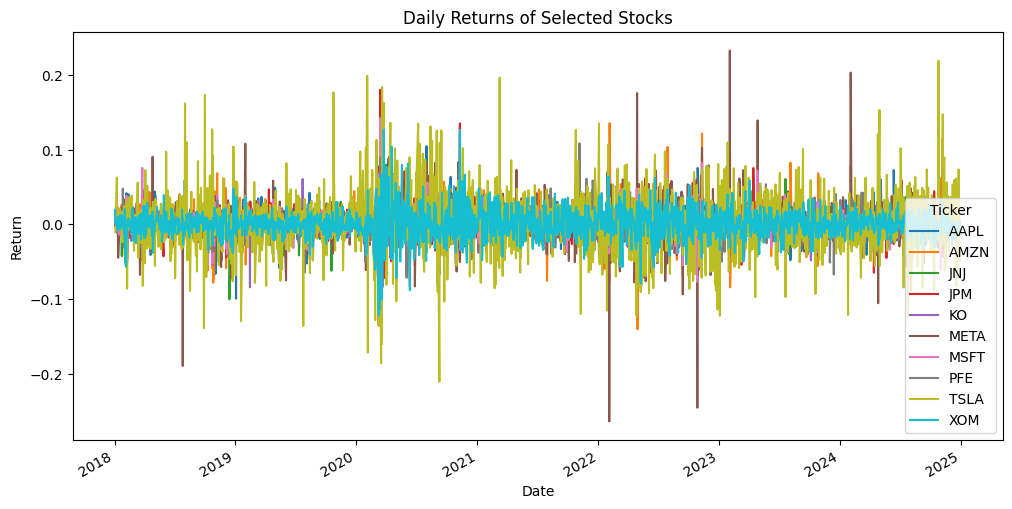

In [9]:
returns.plot(figsize=(12,6))
plt.title("Daily Returns of Selected Stocks")
plt.ylabel("Return")
plt.show()

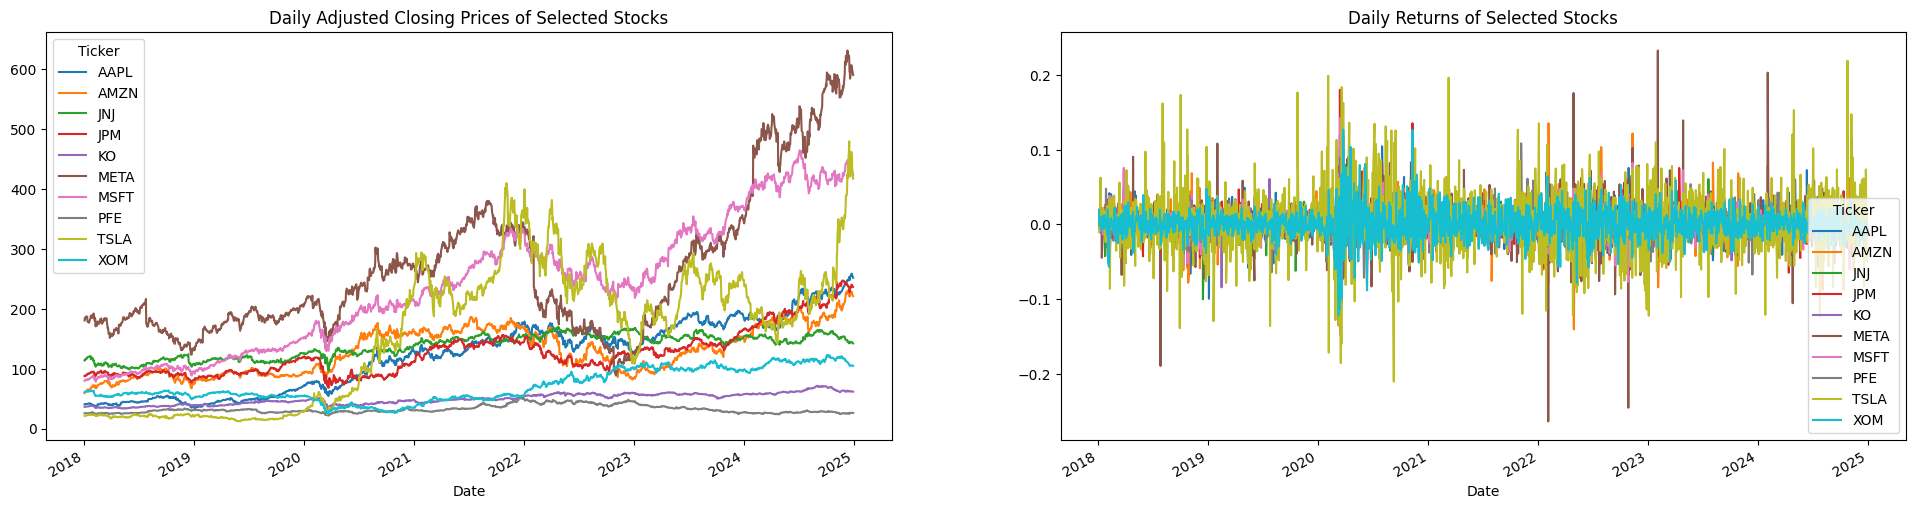

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24,6))
returns.plot(ax=axes[1])
axes[1].set_title("Daily Returns of Selected Stocks")
prices.plot(ax=axes[0])
axes[0].set_title("Daily Adjusted Closing Prices of Selected Stocks")
plt.show()

### Load & Clean the Fama-French Factors

In [16]:
ff_factors = pd.read_csv(factors_path / "F-F_Research_Data_Factors_daily.csv", skiprows=3)
ff_factors = ff_factors.rename(columns=lambda x: x.strip()).iloc[:-1,:]
ff_factors['Date'] = pd.to_datetime(ff_factors.iloc[:,0], format='%Y%m%d')
ff_factors.set_index('Date', inplace=True)
ff_factors = ff_factors[["Mkt-RF", "SMB", "HML", "RF"]] / 100  # Scale from percent to decimals
ff_factors.to_csv(factors_path / "ff3_daily_clean.csv")
print(f"Saved cleaned Fama-French factors to {factors_path / 'ff3_daily_clean.csv'}")
ff_factors

Saved cleaned Fama-French factors to ../data/factors/ff3_daily_clean.csv


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.00009
1926-07-02,0.0045,-0.0033,-0.0006,0.00009
1926-07-06,0.0017,0.0030,-0.0039,0.00009
1926-07-07,0.0009,-0.0058,0.0002,0.00009
1926-07-08,0.0021,-0.0038,0.0019,0.00009
...,...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0005,0.00017
2024-12-26,0.0002,0.0104,-0.0019,0.00017
2024-12-27,-0.0117,-0.0066,0.0056,0.00017


<Axes: xlabel='Date'>

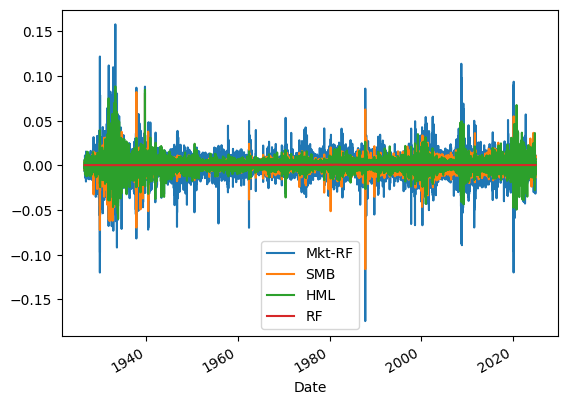

In [29]:
ff_factors.plot()

#### Quick Look

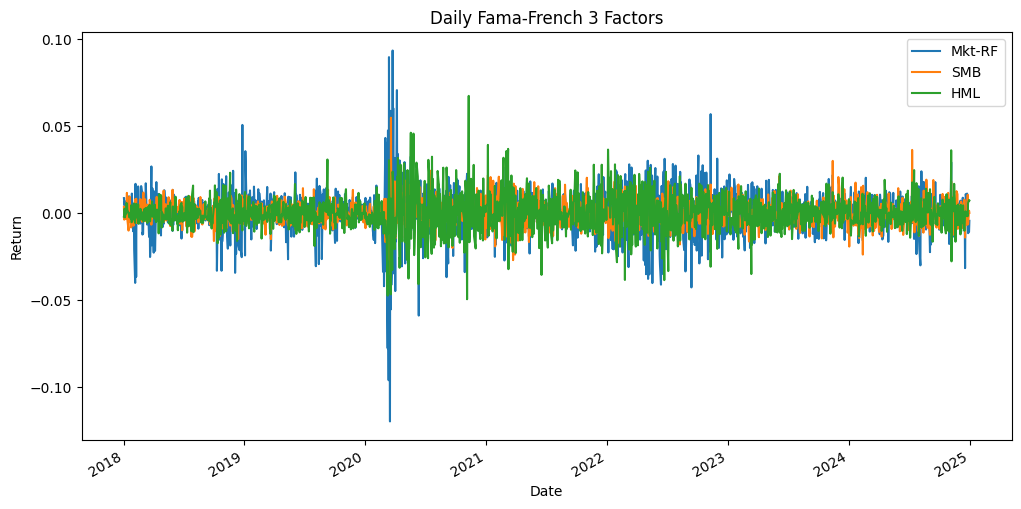

In [33]:
ff_factors[["Mkt-RF", "SMB", "HML"]][ff_factors.index >= prices.index[0]].plot(figsize=(12,6))
plt.title("Daily Fama-French 3 Factors")
plt.ylabel("Return")
plt.show()